In [ ]:
# We will be looking at BikeData.csv which is data regarding bikes rented in a given time
# period based on weather and other temporal information. We will perform multiple linear
# regression using QR decomposition with Modified for Stability Gram Schmidt orthogonalization
# We will only use basic python and libraries(numpy, pandas, scikit-learn and matplotlib)

In [1]:
# Read in our libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression  

In [2]:
# Read in our data and remove data where Bike count was 0

readin = pd.read_csv('/Users/michaelguel/Desktop/ProjectData/BikeData.csv')

data = readin[readin['Rented Bike Count'] != 0].reset_index()

data

,index,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8461,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8462,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8463,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


Rented Bike Count:6172314
Average = 729.1569994093326 , Standard deviation: 642.313223393375


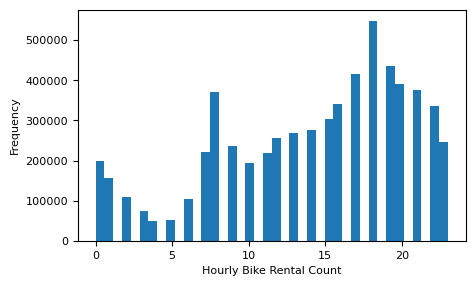

In [3]:
# We are going to visualize our data here is the hourly distribution for rented bikes

plt.figure(figsize=(5,3))
plt.xlabel('Hourly Bike Rental Count', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

mean = data['Rented Bike Count'].sum()/len(data['Hour'])

print(f"Rented Bike Count:{data['Rented Bike Count'].sum()}")
print(f"Average = {data['Rented Bike Count'].sum()/len(data['Hour'])} , Standard deviation: {np.sqrt(((((data['Rented Bike Count'] - mean)**2).sum())/len(data['Hour'])))}")

plt.hist(data['Hour'],weights = data['Rented Bike Count'],bins=40, density=False)
plt.show()

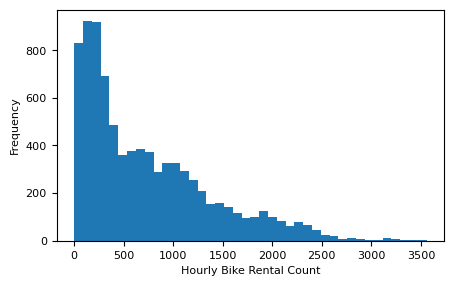

6.087200050530081
1.1630714057346654


In [4]:
# Here we have the distributions of bikes rented and calculation of log_avg and log_std

plt.figure(figsize=(5,3))
plt.xlabel('Hourly Bike Rental Count', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

rented = data['Rented Bike Count']
n = len(data['Rented Bike Count'])
m = rented.sum(axis=0)/n
s = np.sqrt(   (np.sum((rented - m)**2, axis=0) / (n-1)       ))

plt.hist(data['Rented Bike Count'],bins=40)
plt.show()

rentlog = np.log(rented)
nlog = len(rentlog)
mlog = rentlog.sum(axis=0)/nlog
slog = np.sqrt(   (np.sum((rentlog - mlog)**2, axis=0) / (nlog-1)       ))

print(mlog)
print(slog)

log_avg = mlog
log_std = slog

Rented Bike Count (in logarithmic scale): 15.635584366090093
Average = 6.087200050530081 , Standard deviation: 1.1630027048630065


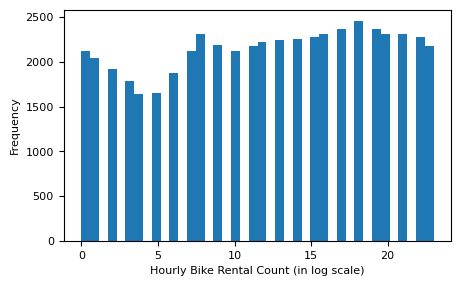

In [5]:
# Here we use log transform to coerce our data towards a normal distribution for hourly distribution

log_avg2 = ((np.log(data['Rented Bike Count'])).sum()) / len(data['Hour'])
log_std2 = np.sqrt(((((np.log(data['Rented Bike Count']) - log_avg)**2).sum())/len(data['Hour'])))

print(f"Rented Bike Count (in logarithmic scale): {np.log(data['Rented Bike Count'].sum())}")
print(f'Average = {log_avg2} , Standard deviation: {log_std2}')

plt.figure(figsize=(5,3))
plt.xlabel('Hourly Bike Rental Count (in log scale)', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.hist(data['Hour'],weights = np.log(data['Rented Bike Count']),bins=40, density=False)
plt.show()

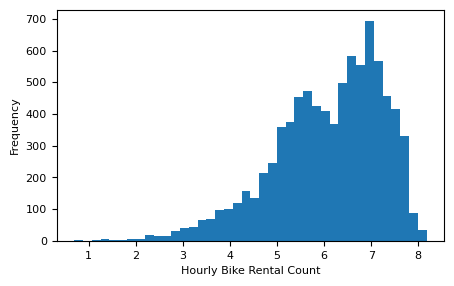

6.087200050530081
1.1630714057346654


In [6]:
# Here we do the same transform for bikes rented frequency

plt.figure(figsize=(5,3))
plt.xlabel('Hourly Bike Rental Count', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

rented = data['Rented Bike Count']
n = len(data['Rented Bike Count'])
m = rented.sum(axis=0)/n
s = np.sqrt(   (np.sum((rented - m)**2, axis=0) / (n-1)       ))

plt.hist(np.log(data['Rented Bike Count']),bins=40)
plt.show()

rentlog = np.log(rented)
nlog = len(rentlog)
mlog = rentlog.sum(axis=0)/nlog
slog = np.sqrt(   (np.sum((rentlog - mlog)**2, axis=0) / (nlog-1)       ))

print(mlog)
print(slog)

log_avg = mlog
log_std = slog

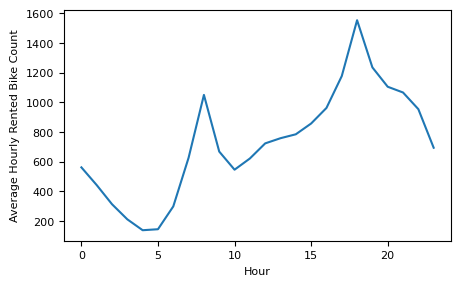

In [7]:
# Here we are looking into the hours frequency with a line plot

toplot = data.groupby('Hour')['Rented Bike Count'].mean()

plt.figure(figsize=(5,3))
plt.xlabel('Hour', fontsize=8)
plt.ylabel('Average Hourly Rented Bike Count', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.plot(toplot)
plt.show()

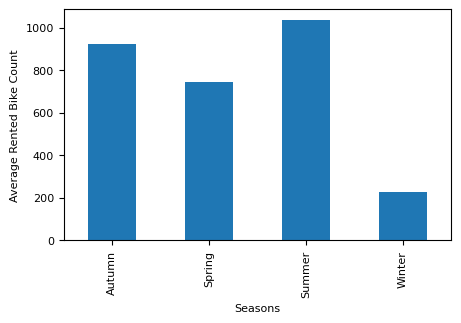

In [8]:
# Distributions of seasons for rentals

toplot = data.groupby(['Seasons'])['Rented Bike Count'].mean()

plt.figure(figsize=(5,3))
plt.xlabel('Season', fontsize=8)
plt.ylabel('Average Rented Bike Count', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

toplot.plot(kind='bar')
plt.show()

<Axes: xlabel='Holiday', ylabel='Average Rented Bike Count'>

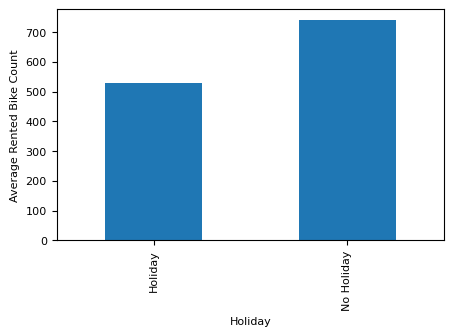

In [9]:
# Distributions of holidays for Bike rentals

toplot = data.groupby(['Holiday'])['Rented Bike Count'].mean()

plt.figure(figsize=(5,3))
plt.xlabel('Holiday', fontsize=8)
plt.ylabel('Average Rented Bike Count', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)


toplot.plot(kind='bar')

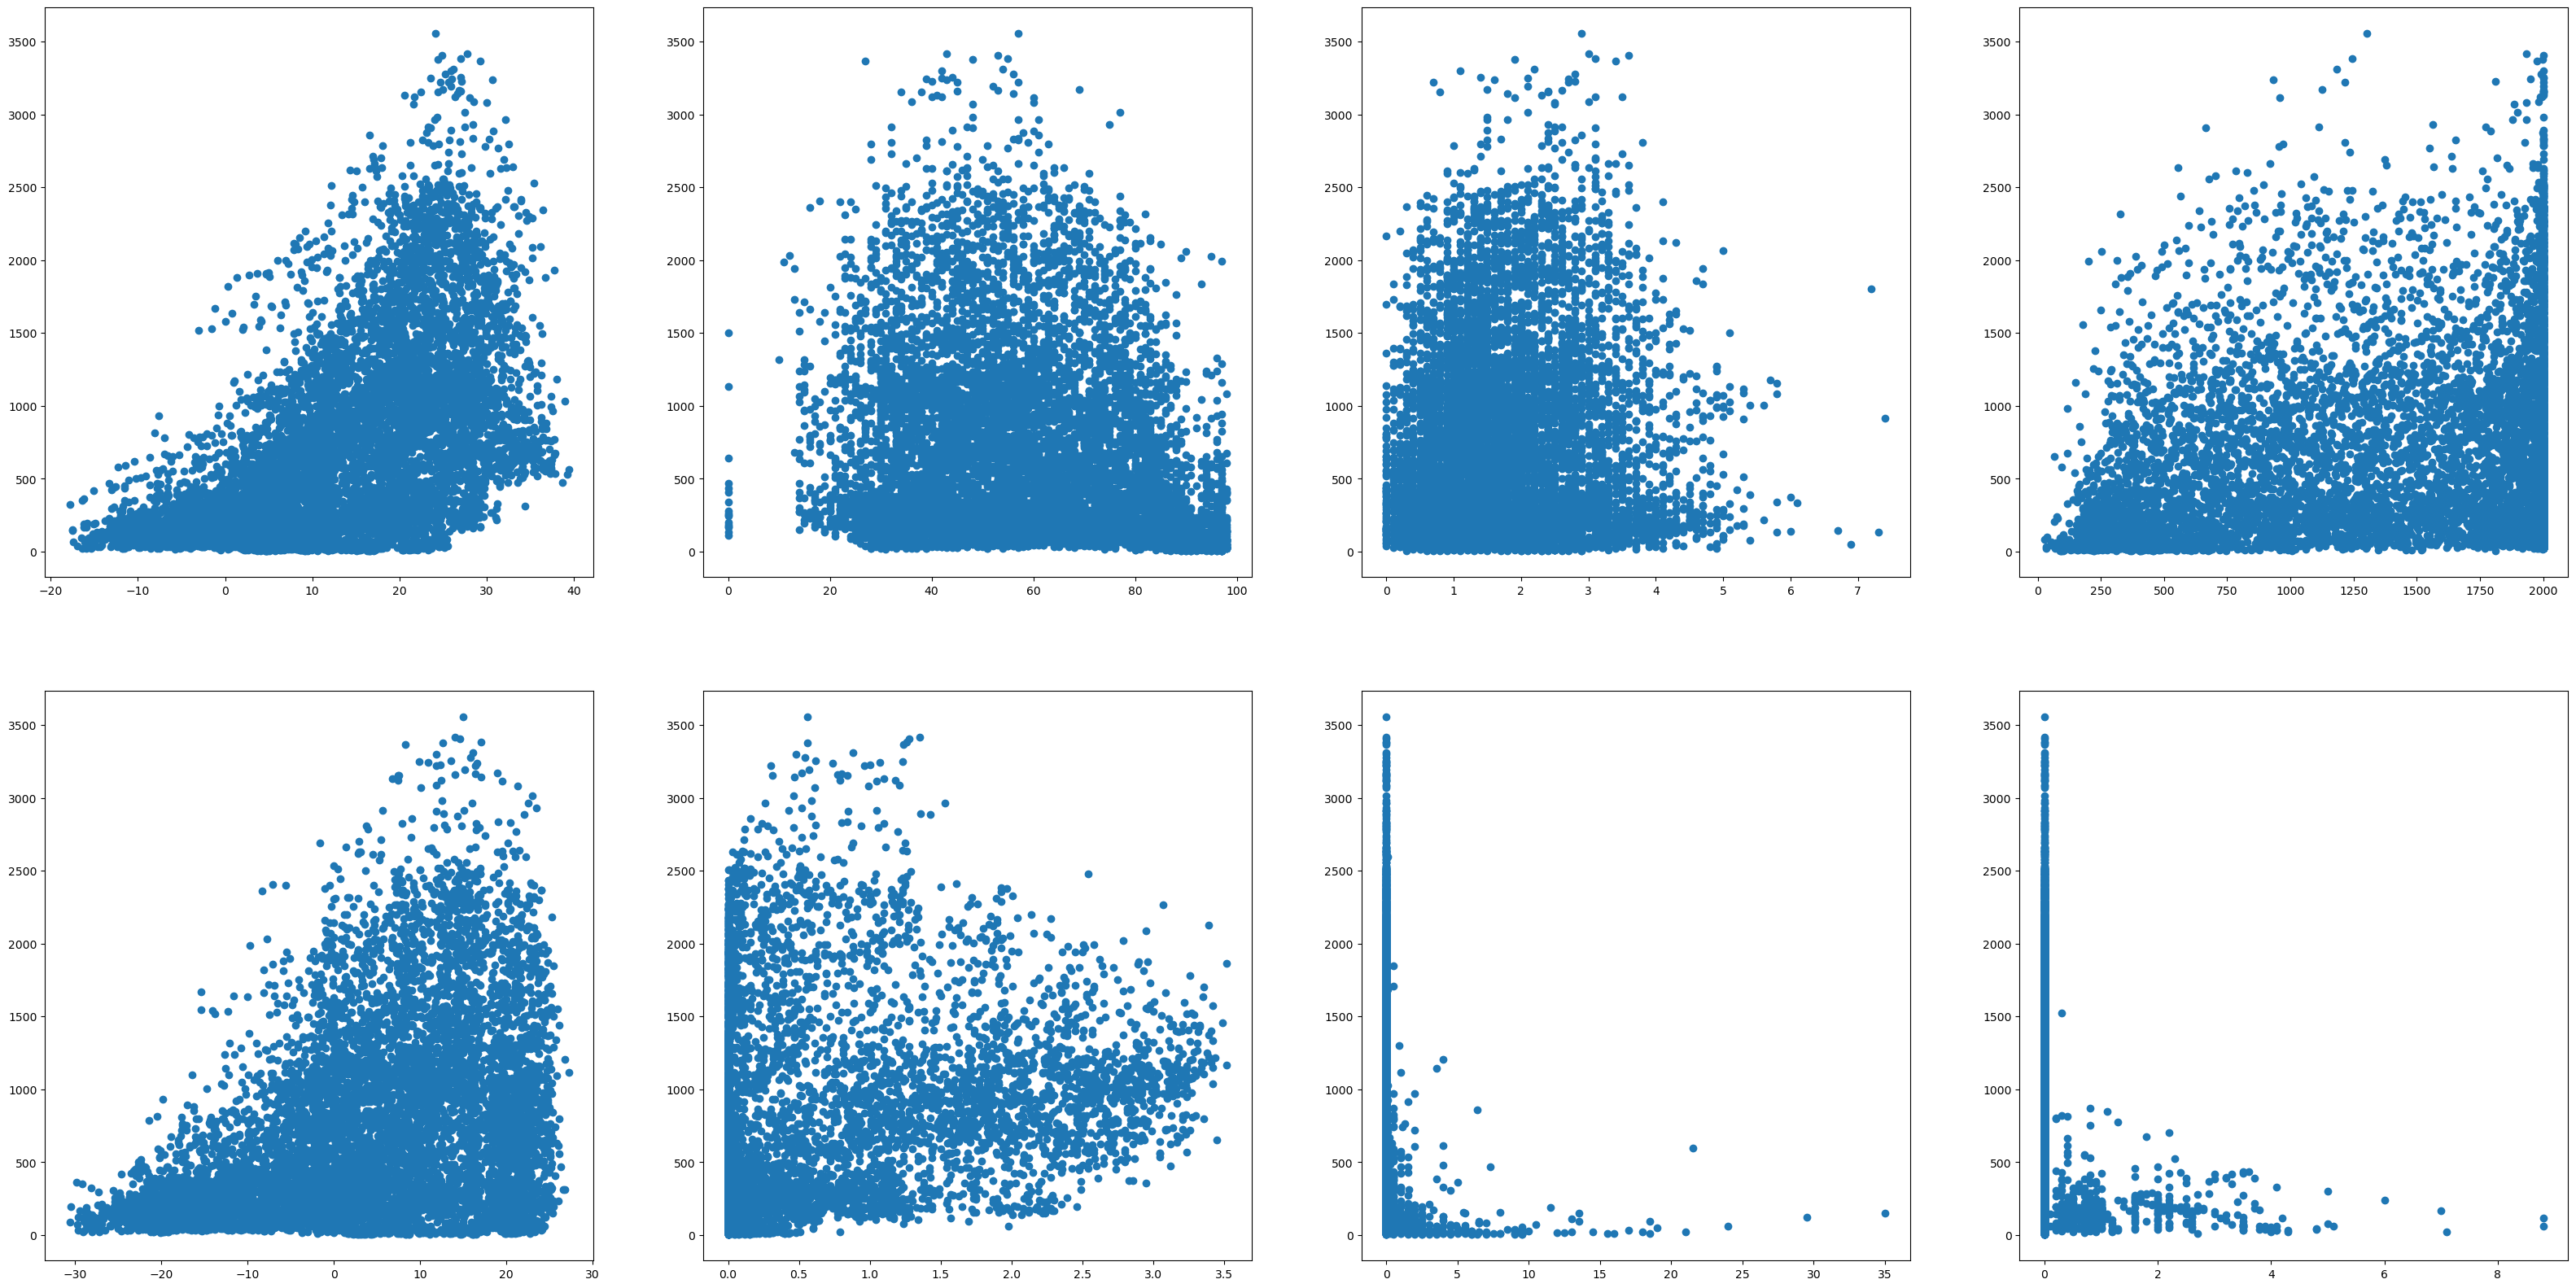

In [10]:
# Here we are looking into the scatter plots of attributes to see correlations

attrs = ['Temperature(C)', 'Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

fig,axes = plt.subplots(nrows = 2, ncols= 4,figsize=(40,20))
for i, column in enumerate(attrs,1):
    plt.subplot(2,4,i)
    plt.scatter(data[column],data['Rented Bike Count'])

In [11]:
# We define our standardization function and preprocessing to prepare the data for modeling

def standardize(arr):
    result = arr.copy()
    m = arr.sum(axis = 0)/arr.shape[0]
    s = np.sqrt(np.sum((arr - m)**2, axis=0)/(arr.shape[0]-1))
    return (result - m)/s


def preprocess(df):
    attrs = ['Temperature(C)', 'Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
    dfc = df.copy()
    dfc['Holiday'] = np.where(dfc['Holiday'] == 'No Holiday',0,1)
    dfc1 = pd.get_dummies(dfc,columns=['Seasons'],prefix='',prefix_sep='',drop_first = False, dtype=int)
    dfc1['Time of Day'] = np.where(dfc1['Hour'] < 6,0,np.where(dfc1['Hour'] < 12, 1, np.where(dfc1['Hour'] < 18, 2, 3)))
    dfc1[attrs] = standardize(dfc1[attrs])
    dfc1['Rented Bike Count'] = standardize(np.log(dfc1['Rented Bike Count']))
    dfc2 = dfc1.drop(['Winter','Hour','index'],axis=1)
    
    return dfc2

In [12]:
data2 = preprocess(data.copy())
data2

,Date,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Time of Day
0,1/12/2017,-0.472770,-1.484675,-1.032334,0.458402,0.929522,-1.626971,-0.654041,-0.132487,-0.17494,0,0,0,0,0
1,1/12/2017,-0.661249,-1.509459,-0.983517,-0.895195,0.929522,-1.626971,-0.654041,-0.132487,-0.17494,0,0,0,0,0
2,1/12/2017,-0.802967,-1.550766,-0.934701,-0.701824,0.929522,-1.634522,-0.654041,-0.132487,-0.17494,0,0,0,0,0
3,1/12/2017,-1.216066,-1.567289,-0.885884,-0.798509,0.929522,-1.626971,-0.654041,-0.132487,-0.17494,0,0,0,0,0
4,1/12/2017,-1.487863,-1.550766,-1.081151,0.555088,0.929522,-1.702486,-0.654041,-0.132487,-0.17494,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,30/11/2018,0.708083,-0.708096,-1.178784,0.845144,0.755481,-1.075711,-0.654041,-0.132487,-0.17494,0,1,0,0,3
8461,30/11/2018,0.474062,-0.774188,-1.032334,0.555088,0.929522,-1.045505,-0.654041,-0.132487,-0.17494,0,1,0,0,3
8462,30/11/2018,0.391439,-0.840279,-0.934701,-1.378622,0.876981,-1.045505,-0.654041,-0.132487,-0.17494,0,1,0,0,3
8463,30/11/2018,0.413455,-0.881587,-0.837068,-0.701824,0.698014,-1.037954,-0.654041,-0.132487,-0.17494,0,1,0,0,3


In [13]:
# Split our predictors and target, discluding Date

y = np.array(data2['Rented Bike Count'])
X = np.array(data2.iloc[:,~data2.columns.isin(['Rented Bike Count','Date'])])
print('Shape of predictor matrix X:', X.shape)
print('Shape of target vector y:', y.shape)

Shape of predictor matrix X: (8465, 13)
Shape of target vector y: (8465,)


In [14]:
# We will use scikit-learn linear regression to compare our decompositiona and ensure that
# it is performing as we would expect

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=1234)

model = LinearRegression()
model.fit(X_train,y_train)
print('Model coefficients:', model.coef_)
print('Model intercept:', model.intercept_)

print('\nModel performance on training set (log scale):')
Ypred = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, Ypred)))

print('\nModel performance on test set (log scale):')
Ypred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, Ypred)))

Model coefficients: [-0.32969887 -0.62425371 -0.03224495  0.00129382  0.86104208  0.01778358
 -0.19837171 -0.00921607 -0.33298031  0.71416205  0.45294771  0.49672373
  0.27593039]
Model intercept: -0.810139049680077

Model performance on training set (log scale):
0.6235214347292308

Model performance on test set (log scale):
0.6007506635270667


In [15]:
# Since we transformed our variables with log transform, we need to use invTransform to 
# properly evaluate our models peformance

def invTransform(z, avg, stdev):
    
    invt = np.exp(z * stdev + avg)
    
    return(invt)

In [16]:
# Again, this is for reference to ensure our approach is peforming as expected

print('\nModel performance on training set (original scale):')
Ypred = model.predict(X_train)
Ypred_orig = invTransform(Ypred, log_avg, log_std)
Ytrain_orig = invTransform(y_train, log_avg, log_std)
print(np.sqrt(mean_squared_error(Ytrain_orig, Ypred_orig)))

print('\nModel performance on test set (original scale):')
Ypred = model.predict(X_test)
Ypred_orig = invTransform(Ypred, log_avg, log_std)
Ytest_orig = invTransform(y_test, log_avg, log_std)
print(np.sqrt(mean_squared_error(Ytest_orig, Ypred_orig)))


Model performance on training set (original scale):
453.35228085168484

Model performance on test set (original scale):
442.28167915282233


In [17]:
# Here we define our QR regression. There are different ways to index for the gram schmidt
# approach and the commented our section is an optional way. 


class QR_LinearRegression():
    """
    Modified for Stability Gram-Schmidt orthogonalization.     
    """
    def QR(self, A):
        m,n = A.shape
        Q = A.copy()
        R = np.zeros((n,n))
        for i in range(n):
            R[i,i] = np.sqrt(np.sum(Q[:,i]**2))
            Q[:,i] = Q[:,i]/R[i,i]
            for j in range(i+1,n):
                R[i,j] = Q[:,j].T @ Q[:,i]
                Q[:,j] = Q[:,j] - R[i,j]*Q[:,i]
                
#     def QR(self,A):
#         n,m = A.shape
#         Q = np.zeros((n,m))
#         R = np.zeros((m,m))
#         for j in range(m):
#             v = A[:,j].copy()
#             for i in range(j):
#                 R[i,j] = Q[:,i].T @ A[:,j]
#                 v -= R[i,j] * Q[:,i]
#             R[j,j] = np.sqrt(np.sum(v**2))
#             Q[:,j] = v/R[j,j]

        
        return (Q, R)

    def backsubstitution(self, U, b):
        o = U.copy()
        a = b.copy()
        init = len(a)
        xxx = np.zeros(init).reshape(init,1)
        for i in range(init-1, -1, -1):
            x = a[i]
            for j in range(init-1,i,-1):
                x -= xxx[j]*o[i,j]
            xxx[i] = x/o[i,i]
        
        return xxx
   
    def fit(self, X, y):
        X_train = np.column_stack([np.ones(len(y)),X])
        A = np.dot(X_train.T, X_train)
        b = np.dot(X_train.T, y_train)
        Q,R = self.QR(A)
        b = np.dot(Q.T,b)
        w = self.backsubstitution(R,b)
        
        self.coef = w[1:]
        self.intercept = w[0]
        self.w = w
                
    def predict(self, X):
        X_test = np.column_stack([np.ones(len(X)),X])
        Y_pred = np.dot(X_test,self.w)
        
        return Y_pred

In [18]:
# Call our class and see what our results are for coefficients. Check against scikit-learn
# and we see that our implementation was correct

model = QR_LinearRegression()
model.fit(X_train, y_train)

print('Model coefficients: ',model.coef)
print('Model intercept: ',model.intercept)

Model coefficients:  [[-0.32969887]
 [-0.62425371]
 [-0.03224495]
 [ 0.00129382]
 [ 0.86104208]
 [ 0.01778358]
 [-0.19837171]
 [-0.00921607]
 [-0.33298031]
 [ 0.71416205]
 [ 0.45294771]
 [ 0.49672373]
 [ 0.27593039]]
Model intercept:  [-0.81013905]


In [19]:
# Check again and see that our model peformed the same!

print('\nModel performance on training set (original scale):')
Ypred = model.predict(X_train)
Ypred_orig = invTransform(Ypred, log_avg, log_std)
Ytrain_orig = invTransform(y_train, log_avg, log_std)
print(np.sqrt(mean_squared_error(Ytrain_orig, Ypred_orig)))

print('\nModel performance on test set (original scale):')
Ypred = model.predict(X_test)
Ypred_orig = invTransform(Ypred, log_avg, log_std)
Ytest_orig = invTransform(y_test, log_avg, log_std)
print(np.sqrt(mean_squared_error(Ytest_orig, Ypred_orig)))


Model performance on training set (original scale):
453.3522808517899

Model performance on test set (original scale):
442.2816791528694
